In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:01<00:00, 125MB/s]
100% 149M/149M [00:01<00:00, 117MB/s]


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  #Iterate through the directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path,label)

    #Check if it's a directory
    if os.path.isdir(label_path):
      #Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path,image)

        #Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df



In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


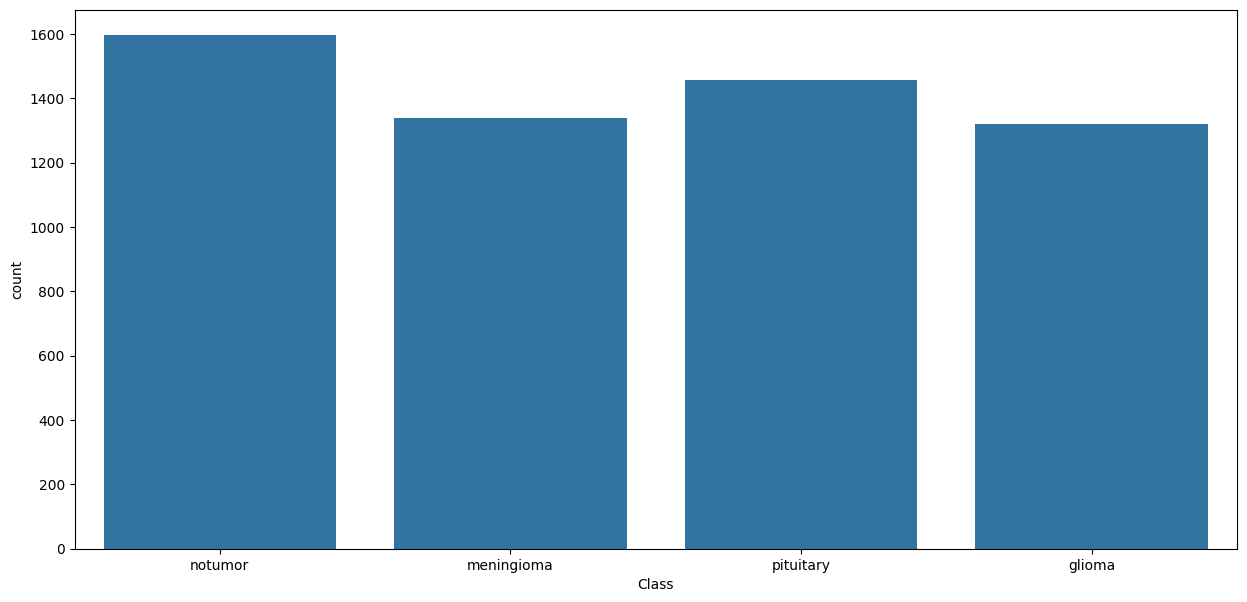

In [8]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = tr_df, x = tr_df['Class'])

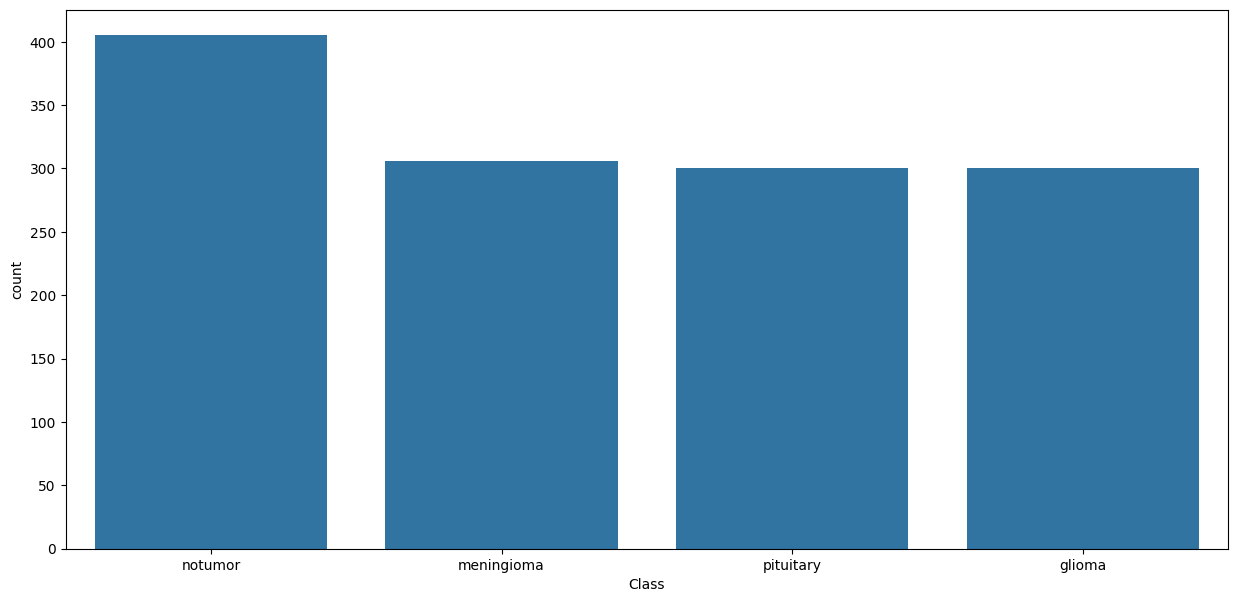

In [9]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = ts_df, x = ts_df['Class'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size = 0.5, stratify= ts_df['Class'])


In [12]:
valid_df

,Class Path,Class
548,/content/Testing/meningioma/Te-me_0221.jpg,meningioma
216,/content/Testing/notumor/Te-no_0285.jpg,notumor
783,/content/Testing/pituitary/Te-pi_0088.jpg,pituitary
1028,/content/Testing/glioma/Te-gl_0288.jpg,glioma
926,/content/Testing/pituitary/Te-pi_0041.jpg,pituitary
...,...,...
679,/content/Testing/meningioma/Te-me_0295.jpg,meningioma
1147,/content/Testing/glioma/Te-gl_0127.jpg,glioma
231,/content/Testing/notumor/Te-no_0204.jpg,notumor
1049,/content/Testing/glioma/Te-gl_0019.jpg,glioma


In [13]:
ts_df

,Class Path,Class
825,/content/Testing/pituitary/Te-pi_0144.jpg,pituitary
596,/content/Testing/meningioma/Te-me_0265.jpg,meningioma
765,/content/Testing/pituitary/Te-pi_0158.jpg,pituitary
148,/content/Testing/notumor/Te-noTr_0005.jpg,notumor
443,/content/Testing/meningioma/Te-me_0233.jpg,meningioma
...,...,...
368,/content/Testing/notumor/Te-no_0109.jpg,notumor
866,/content/Testing/pituitary/Te-pi_0049.jpg,pituitary
912,/content/Testing/pituitary/Te-pi_0016.jpg,pituitary
1071,/content/Testing/glioma/Te-gl_0167.jpg,glioma


In [14]:
batch_size = 32

img_size = (299,299)

image_generator = ImageDataGenerator(rescale = 1/255, brightness_range = (0.8, 1.2))

ts_gen = ImageDataGenerator(rescale = 1/255)


In [15]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col = 'Class Path',
                                             y_col = 'Class',
                                             batch_size = batch_size,
                                             target_size = img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col = 'Class Path',
                                             y_col = 'Class',
                                             batch_size = batch_size,
                                             target_size = img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col = 'Class Path',
                                             y_col = 'Class',
                                             batch_size = 16,
                                             target_size = img_size, shuffle = False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


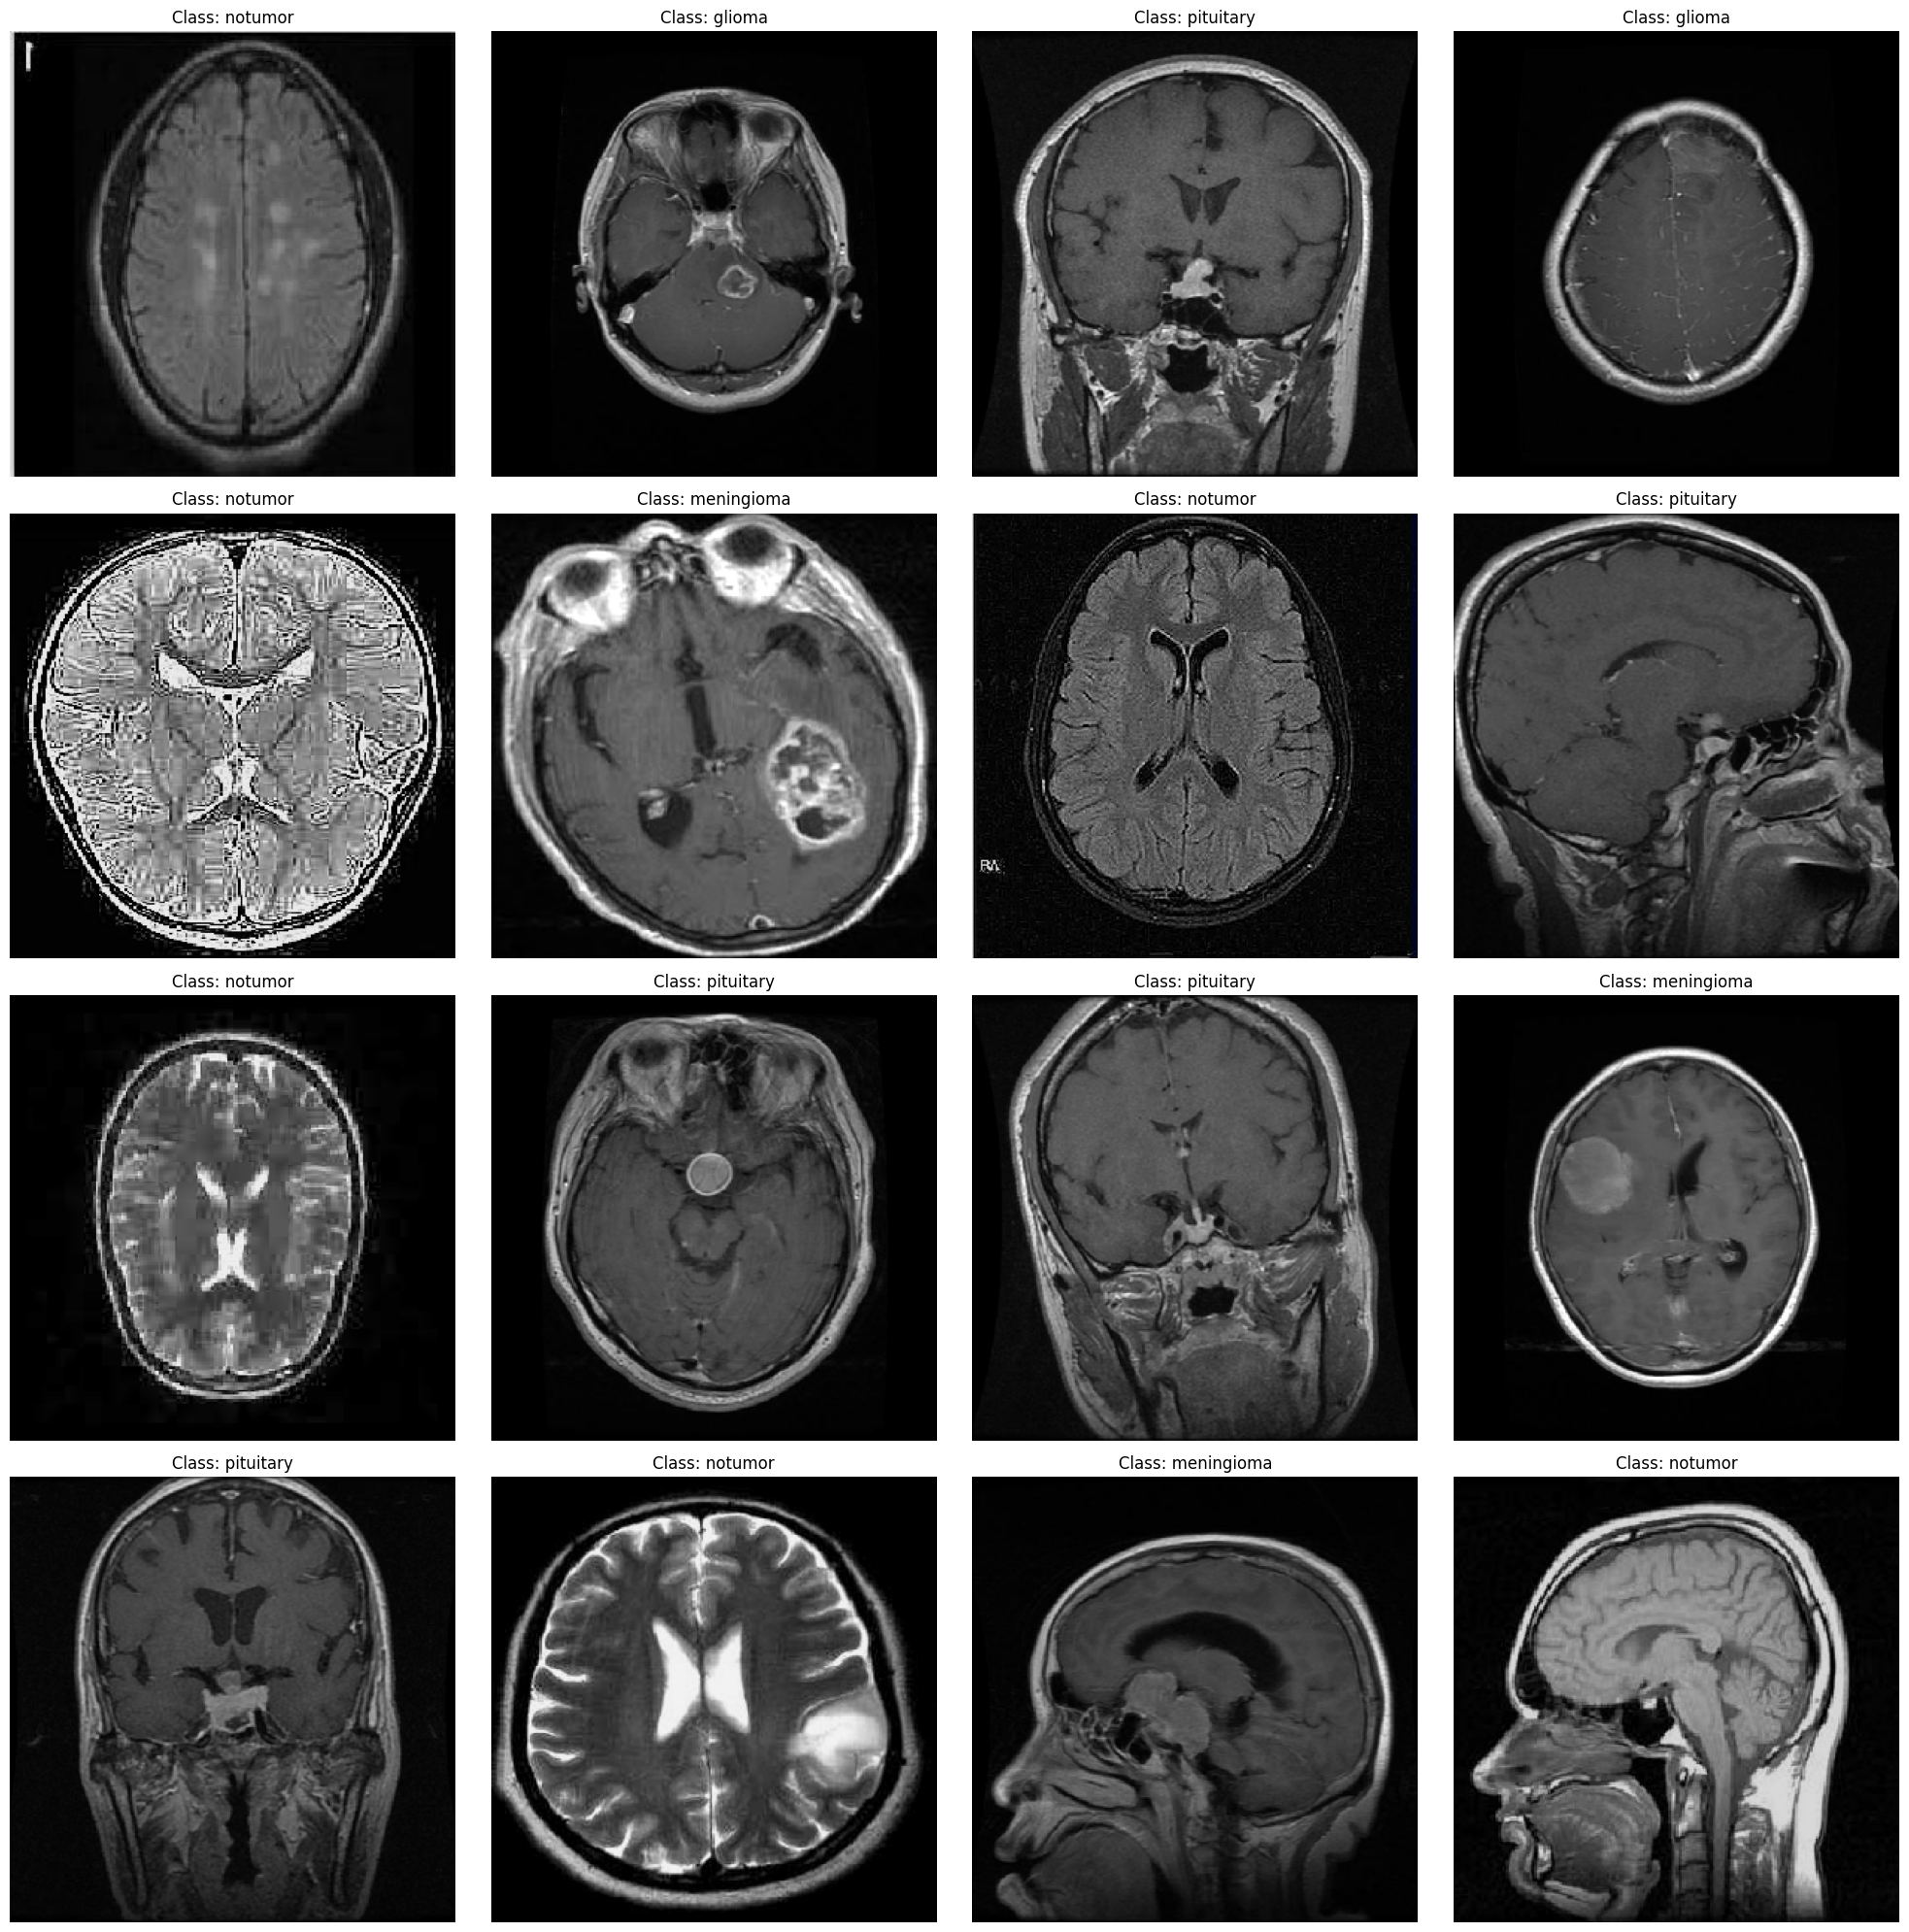

In [16]:
plt.figure(figsize = (20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get class index
  class_index = np.argmax(label)

  #Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  #Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  #Get the class ame using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()


In [17]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top = False,
                                            weights = "imagenet",
                                            input_shape = img_shape,
                                            pooling = 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(128, activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(4, activation = 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
model.compile(Adamax(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy',
                         Precision(),
                         Recall()])

In [19]:
hist = model.fit(tr_gen, epochs = 5, validation_data = valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7582 - loss: 0.7510 - precision: 0.8366 - recall: 0.6153 - val_accuracy: 0.8977 - val_loss: 0.3149 - val_precision: 0.8986 - val_recall: 0.8931
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 789ms/step - accuracy: 0.9747 - loss: 0.0784 - precision: 0.9760 - recall: 0.9721 - val_accuracy: 0.9679 - val_loss: 0.0890 - val_precision: 0.9679 - val_recall: 0.9664
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 197s 764ms/step - accuracy: 0.9877 - loss: 0.0385 - precision: 0.9884 - recall: 0.9874 - val_accuracy: 0.9924 - val_loss: 0.0523 - val_precision: 0.9939 - val_recall: 0.9893
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 776ms/step - accuracy: 0.9945 - loss: 0.0268 - precision: 0.9949 - recall: 0.9942 - val_accuracy: 0.9832 - val_loss: 0.0580 - val_precision: 0.9832 - val_recall: 0.9817
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 776ms/step - accuracy: 0.9956 - loss: 0.0129 - precision: 0.9958 - recall: 0.9955 - val_accuracy: 0.9878 - val_loss: 